In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import collections
import networkx as nx
from wordcloud import WordCloud
%matplotlib inline


# Tweet count

In [11]:
data_dict = {}
data_dict_bucheon = {}
data_dict_major = {}

with open('/data_hdd/socioscope/data/tweets_bucheon.csv') as file:
    file.readline()
    for line in file:
        line_arr = line.split(",")
        date = line_arr[1].split()[0]
        
        if date not in data_dict:
            data_dict[date] = 1
        else:
            data_dict[date] += 1
        
        if "부천" in line:
            if date not in data_dict_bucheon:
                data_dict_bucheon[date] = 1
            else:
                data_dict_bucheon[date] += 1
                
        if "장덕천" in line:
            if date not in data_dict_major:
                data_dict_major[date] = 1
            else:
                data_dict_major[date] += 1

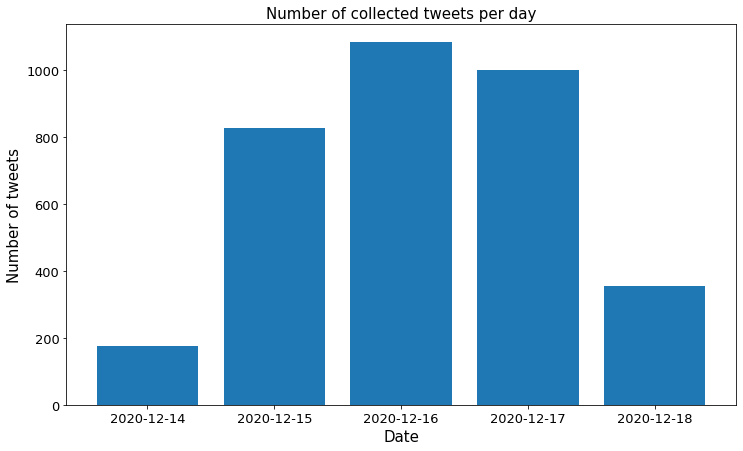

In [25]:
plt.figure(figsize=(12, 7))
plt.bar(data_dict.keys(), data_dict.values())
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of tweets", fontsize=15)
plt.title("Number of collected tweets per day", fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

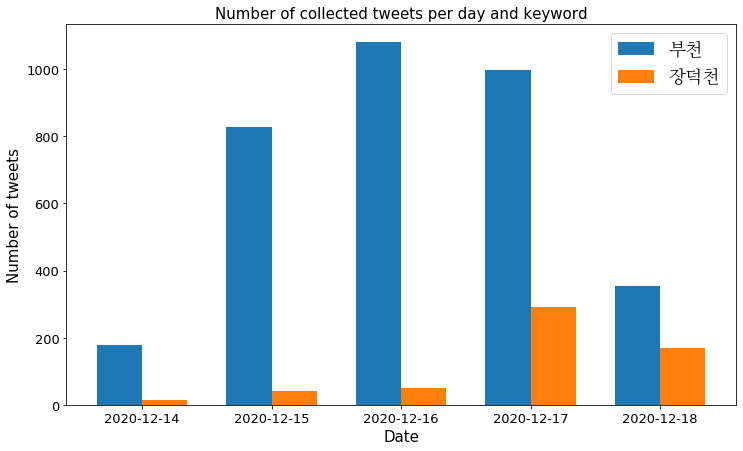

In [44]:
plt.figure(figsize=(12, 7))
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

width = 0.35
x = np.arange(len(data_dict))
plt.bar(x, data_dict_bucheon.values(), width, label='부천')
plt.bar(x + width, data_dict_major.values(), width, label='장덕천')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of tweets", fontsize=15)
plt.title("Number of collected tweets per day and keyword", fontsize=15)

plt.xticks(x + width/2, data_dict.keys(), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(prop=fontprop)

plt.show()

# Most popular word

In [97]:
counter_bucheon = collections.Counter()
counter_major = collections.Counter()

with open('/data_hdd/socioscope/data/bucheon_words.csv') as file:
    for line in file:
#         line_arr = line.strip()[3: -3].split("', '")
        line_arr = line.strip().split()
        
        
        if "부천" in line:
            counter_bucheon.update(line_arr)
                
        if "장덕천" in line:
            counter_major.update(line_arr)

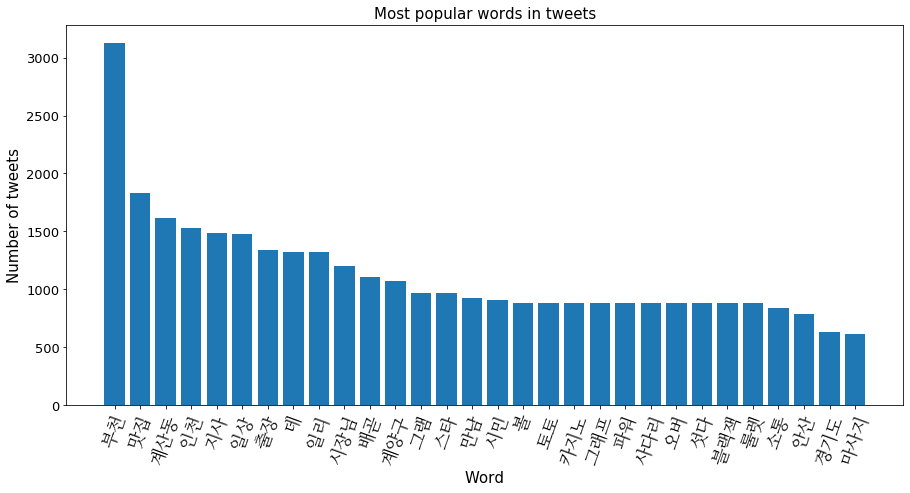

In [98]:
word_com = counter_bucheon.most_common(30)
word = [x[0] for x in word_com]
count = [x[1] for x in word_com]


plt.figure(figsize=(15, 7))
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.bar(word, count)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Number of tweets", fontsize=15)
plt.title("Most popular words in tweets", fontsize=15)

plt.xticks(fontsize=13, fontproperties=fontprop, rotation=70)
plt.yticks(fontsize=13)

plt.show()

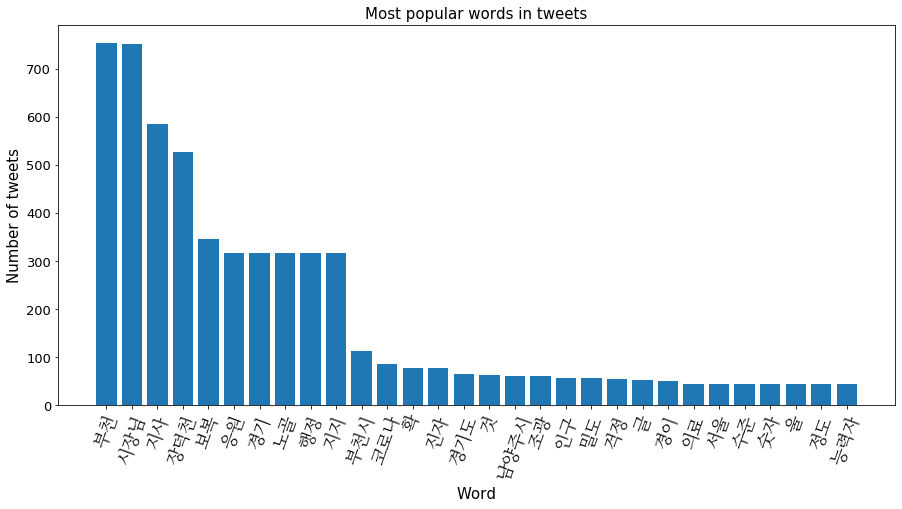

In [100]:
word_com = counter_major.most_common(30)
word = [x[0] for x in word_com]
count = [x[1] for x in word_com]


plt.figure(figsize=(15, 7))
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.bar(word, count)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Number of tweets", fontsize=15)
plt.title("Most popular words in tweets", fontsize=15)

plt.xticks(fontsize=13, fontproperties=fontprop, rotation=70)
plt.yticks(fontsize=13)

plt.show()

# Wordcloud

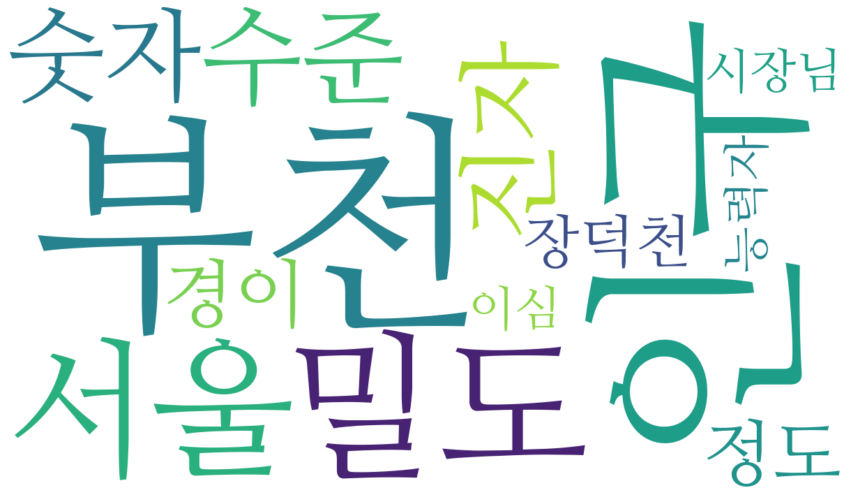

In [122]:
text_list = []
with open('/data_hdd/socioscope/data/bucheon_words.csv') as file:
    for line in file:
        text_list.append(line)
        
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
plt.figure(figsize=(15, 12))
text = " ".join(text_list)
wordcloud = WordCloud(font_path=path, width=1200, height=700, background_color="white").generate(line)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word network

In [115]:
G = nx.Graph()

with open('/data_hdd/socioscope/data/bucheon_words.csv') as file:
    for line in file:
#         line_arr = line.strip()[3: -3].split("', '")
        line_arr = line.strip().split()
        G.add_nodes_from(line_arr)
        
        for i in range(len(line_arr)):
            for j in range(i + 1, len(line_arr)):
                G.add_edge(line_arr[i], line_arr[j])
                
#         break

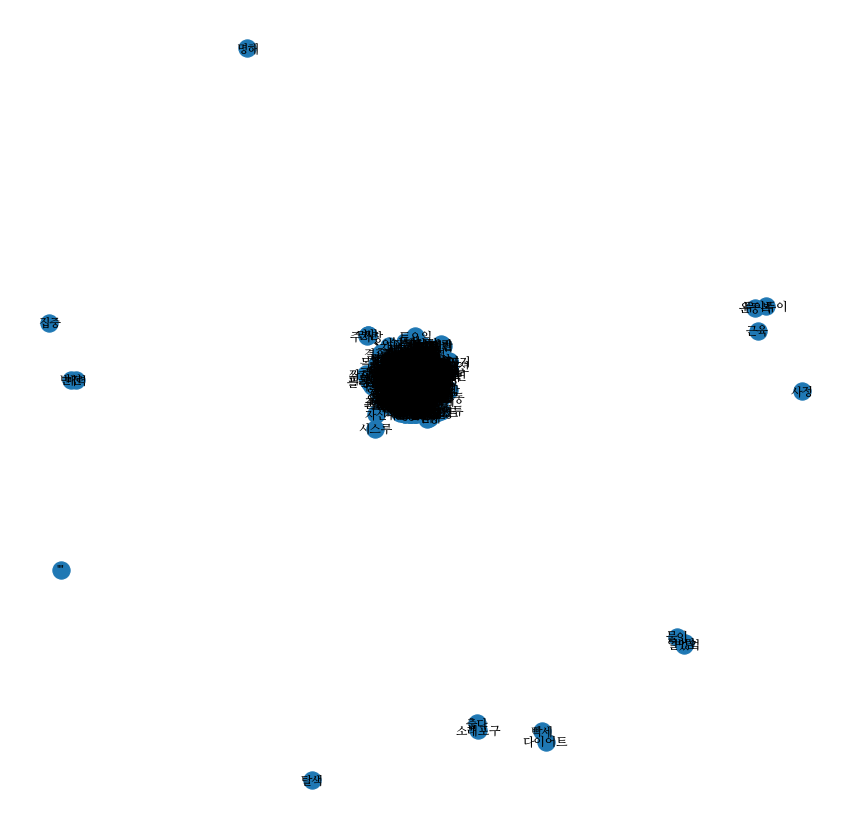

In [104]:
plt.figure(figsize=(15, 15))
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold', font_family=fontprop)